___

# PROJETO 2 - Ciência dos Dados 2021.1
#### Rodrigo Guilherme Araujo Pires

___
<div id="indice"></div>


## Índice


BASE DE DADOS: https://www.kaggle.com/therealsampat/predict-movie-success-rate/code

___

<div id="intro"></div>

## A. Introdução
Este projeto tem o objetivo de prever uma variável principal em função de demais outras variáveis 
que podem influenciar em seu comportamento. Para isso foi escolhida uma base de dados em uma pergunta 

___

<div id="dados"></div>

## B. Minerando Dados e Características do Dataset

Importando bibliotecas e dataset:

In [4]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd
from scipy import stats

In [5]:
dados = pd.read_csv('movie_success_rate.csv') # Importa a base de dados
dados=dados.dropna() # Remove linhas com valores faltando

In [6]:
dados

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,994.0,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010.0,97.0,5.9,140900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.7,164088.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.5,73152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.2,70699.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Histograma apenas utilizando o primeiro genero na coluna de generos
primeiro_genero = dados['Genre'].str.split(",", expand=True)[0]
generos = primeiro_genero.value_counts()
primeiro_genero.value_counts()

Action       268
Comedy       151
Drama        148
Adventure     68
Biography     55
Crime         53
Animation     45
Horror        34
Mystery       11
Sci-Fi         2
Fantasy        2
Thriller       1
Name: 0, dtype: int64

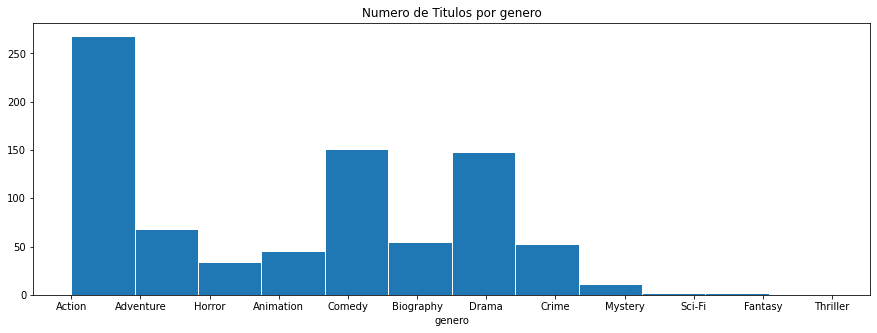

In [8]:
plt.figure(figsize=(15, 5))
plt.hist(primeiro_genero, bins=len(generos), edgecolor='white')
plt.title('Numero de Titulos por genero')
plt.xlabel('genero')
plt.show()

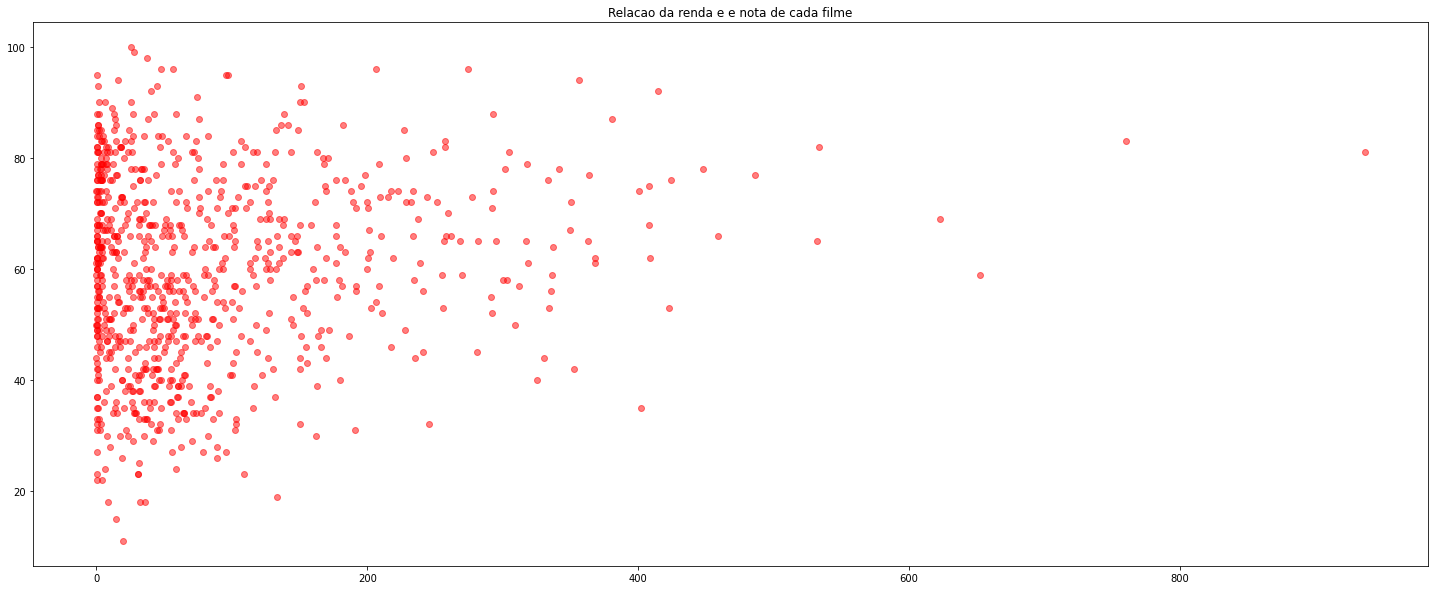

In [9]:
plt.figure(figsize=(25, 10))
plt.title('Relacao da renda e e nota de cada filme')
plt.scatter(dados['Revenue (Millions)'], dados['Metascore'], c='red', alpha=0.5)
plt.show()

___

<div id="modelos"></div>

## C. Modelos de Predição e Estatísticas de Validação

### 1. Random Forest Regression

#### O Random Forest Regression constrói múltiplas árvores de decisão durante seu trinamento, retornando a média das predições de cada árvore. É considerado um modelo robusto e não enviesado, porém requer um maior poder computacional.

#### Para implementar o modelo será utilizado `RandomForestRegressor` do módulo `sklearn.ensemble`. Outros módulos que serão usados depois também importados.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Selecionando as colunas utilizadas para o modelo de predição:
- $y$ será a avaliacão do filme

In [144]:
x = dados[['Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
x.head(10)

,Year,Runtime (Minutes),Votes,Revenue (Millions),Action,Adventure,Aniimation,Biography,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2014.0,121.0,757074.0,333.13,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2012.0,124.0,485820.0,126.46,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016.0,117.0,157606.0,138.12,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2016.0,108.0,60545.0,270.32,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016.0,123.0,393727.0,325.02,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016.0,103.0,56036.0,45.13,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016.0,128.0,258682.0,151.06,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016.0,141.0,7188.0,8.01,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016.0,116.0,192177.0,100.01,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2016.0,133.0,232072.0,234.02,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
y = dados['Rating']
y.head(10)

0    8.1
1    7.0
2    7.3
3    7.2
4    6.2
5    6.1
6    8.3
7    7.1
8    7.0
9    7.5
Name: Rating, dtype: float64

#### Separando a base de dados em treinamento e teste com `train_test_split`:
- parâmetro: `test_size=0.1` - 10% serão usados para teste

In [215]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x ,y , test_size=0.1, random_state=0)


#### `RandomForestRegressor` utilizado com os parâmetros:
- `n_estimators`: número de árvores
- `random_state`: controla a aleatoriedade de escolhas do modelo, 0 é a maior consistência
    

In [216]:
rfr = RandomForestRegressor(n_estimators = 500, random_state=0)
rfr = rfr.fit(x_treinamento, y_treinamento)
y_predicao = rfr.predict(x_teste)

#### Verificando a performance:
- `.score()` (varia de 0 a 1): comparando os valores previstos pelo modelo com os valores na base de treino, quanto mais próximo de 1, melhor.

In [240]:
rfr.score(x_treinamento , y_treinamento)

0.9335924354985734

- `.score()`: agora comparando os valores previstos pelo modelo com os valores que o modelo não usou, que estão na base teste, quanto mais próximo de 1.0, melhor.

In [241]:
rfr.score(x_teste, y_teste)

0.566780069611448

- `mean_squared_error` - Raiz Quadrada do Erro Quadrático Médio: calcula uma medida da diferença entre os valores previstos e os valores reais, quanto mais próximo de 0, melhor.

In [247]:
rmse = np.sqrt(mean_squared_error(y_teste, y_predicao))
rmse

0.6458451911661046

#### Histograma dos resíduos do modelo

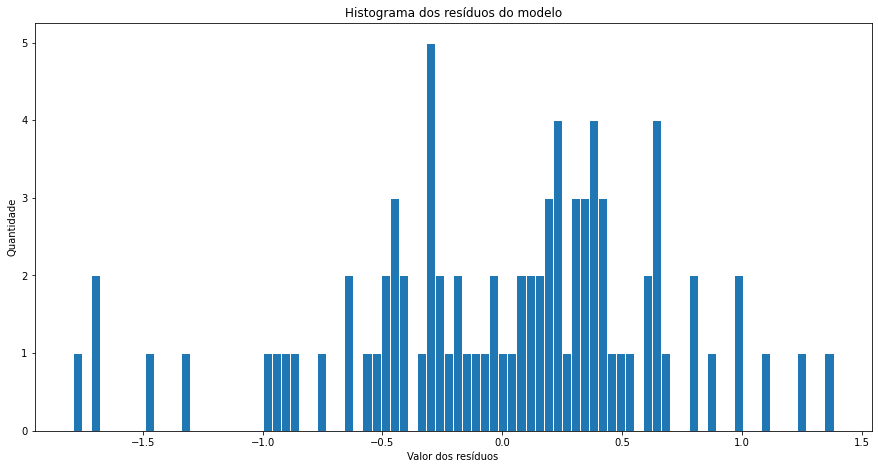

In [254]:
residuos = y_teste - y_predicao

plt.figure(figsize=(15, 7.5))
plt.hist(residuos,edgecolor='white', bins=len(y_teste));
plt.title('Histograma dos resíduos do modelo')
plt.ylabel('Quantidade')
plt.xlabel('Valor dos resíduos')
plt.show()

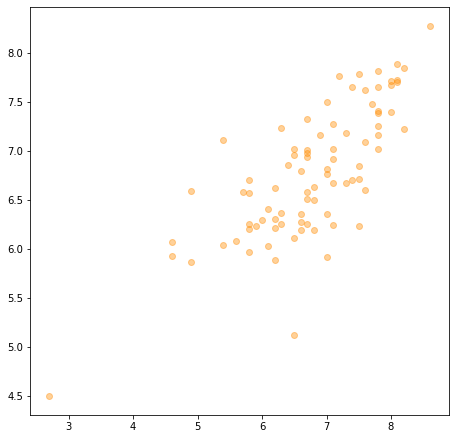

In [257]:
plt.figure(figsize=(7.5, 7.5))
plt.scatter(y_teste, y_predicao, color='darkorange', alpha=0.4)
plt.show()

___

<div id="conclusao"></div>

## D. Conclusão

___

<div id="refs"></div>

## E. Referências Bibliográficas

- BASE DE DADOS: https://www.kaggle.com/therealsampat/predict-movie-success-rate
- https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/
- https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn
- https://heartbeat.fritz.ai/random-forest-regression-in-python-using-scikit-learn-9e9b147e2153
- https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-est%C3%A1-funcionando-mesmo-a5892f6468b